Dataset shape: (4184, 5)

First few rows:


,Unnamed: 0,trading_day,stock,post,label
0,0,2021-09-30,AAPL,I bought my first $AAPL stock in 2010. Since t...,-1.0
1,1,2021-09-30,AMD,AMD Expands Collaboration With Google Cloud to...,1.0
2,2,2021-09-30,AMZN,Shopify is now 9% of US e-commerce. It really ...,-1.0
3,3,2021-09-30,DIS,$DIS Read I'm saying this mf is READY and I'm ...,-1.0
4,4,2021-09-30,GOOG,Thanks goog [URL],-1.0



Missing values:
Unnamed: 0     0
trading_day    0
stock          0
post           0
label          0
dtype: int64

Basic statistics:


,Unnamed: 0,label
count,4184.000000,4184.000000
mean,2960.186185,-0.216061
std,1718.291406,0.976497
min,0.000000,-1.000000
25%,1477.750000,-1.000000
50%,2951.500000,-1.000000
75%,4463.250000,1.000000
max,5909.000000,1.000000



Label distribution:
label
-1.0    2544
 1.0    1640
Name: count, dtype: int64


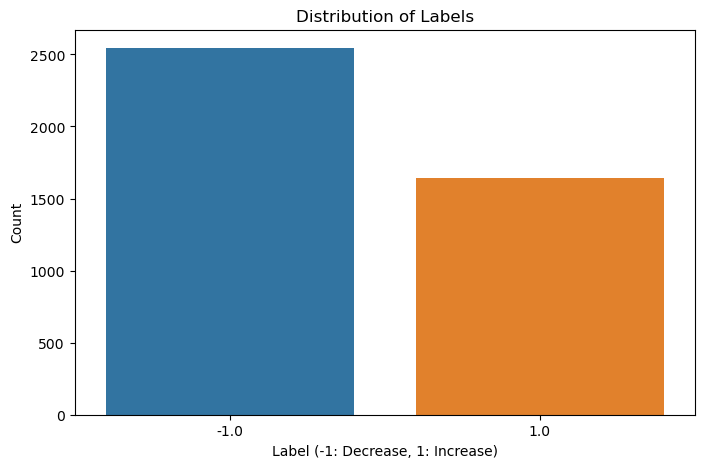

Timestamp range: 2021-09-30 00:00:00 to 2022-09-29 00:00:00
Number of unique timestamps: 252
Train-test cutoff timestamp: 2022-07-20 00:00:00
Training set size: 3363 (80.38% of data)
Testing set size: 821 (19.62% of data)

Train set label distribution:
label
-1.0    0.618793
 1.0    0.381207
Name: proportion, dtype: float64

Test set label distribution:
label
-1.0    0.563946
 1.0    0.436054
Name: proportion, dtype: float64

Stock distribution:
stock
AAPL    252
NIO     252
AMZN    252
PG      252
MSFT    252
TSLA    252
TSM     252
AMD     249
GOOG    238
NFLX    228
Name: count, dtype: int64
Training features shape: (3363, 5000)
Testing features shape: (821, 5000)
Number of features (words): 5000
Sample features: ['00' '000' '006' '01' '02' '03' '04' '05' '06' '07']
Naive Bayes Results:
Accuracy: 0.5676
F1 Score: 0.4755

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.57      0.92      0.71       463
         1.0       0.52      0.1

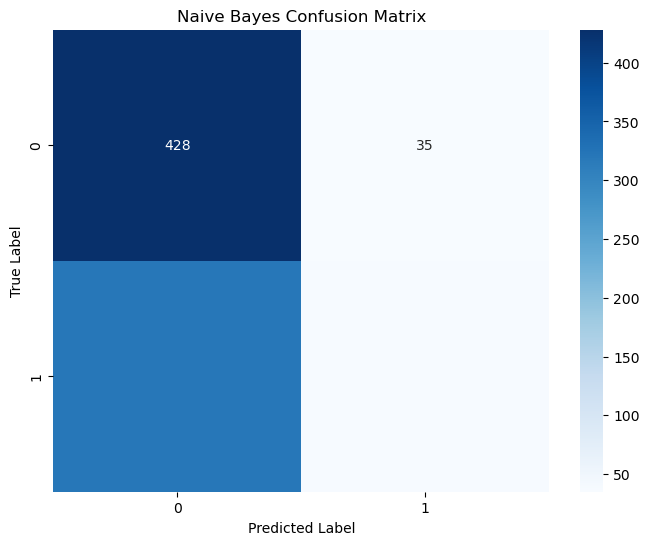

SVM Results:
Accuracy: 0.5725
F1 Score: 0.5584

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.60      0.73      0.66       463
         1.0       0.51      0.37      0.43       358

    accuracy                           0.57       821
   macro avg       0.56      0.55      0.54       821
weighted avg       0.56      0.57      0.56       821



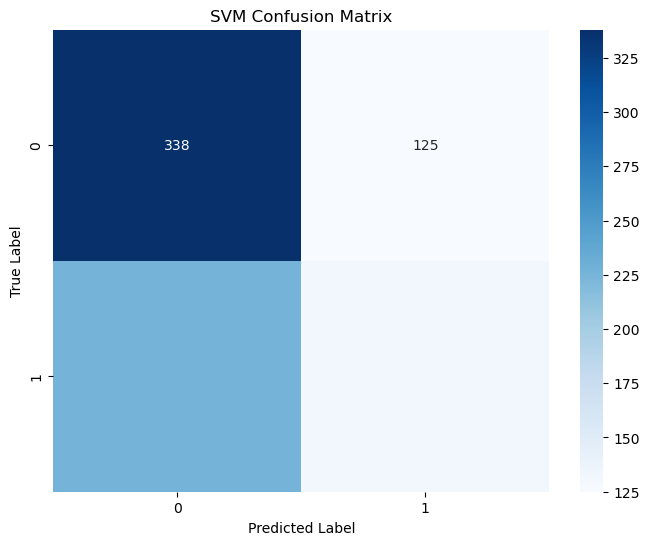


Top 10 words indicating price INCREASE:
week: 2.2834
li: 1.9892
209: 1.8752
good: 1.8313
hwasa: 1.7572
ev: 1.7248
fdx: 1.6786
green: 1.6721
90: 1.6713
1000: 1.6287

Top 10 words indicating price DECREASE:
down: -2.6115
bearish: -2.2632
pg: -1.7600
and: -1.7508
intc: -1.6883
122: -1.6600
low: -1.5905
21: -1.5606
amc: -1.5517
could: -1.5022


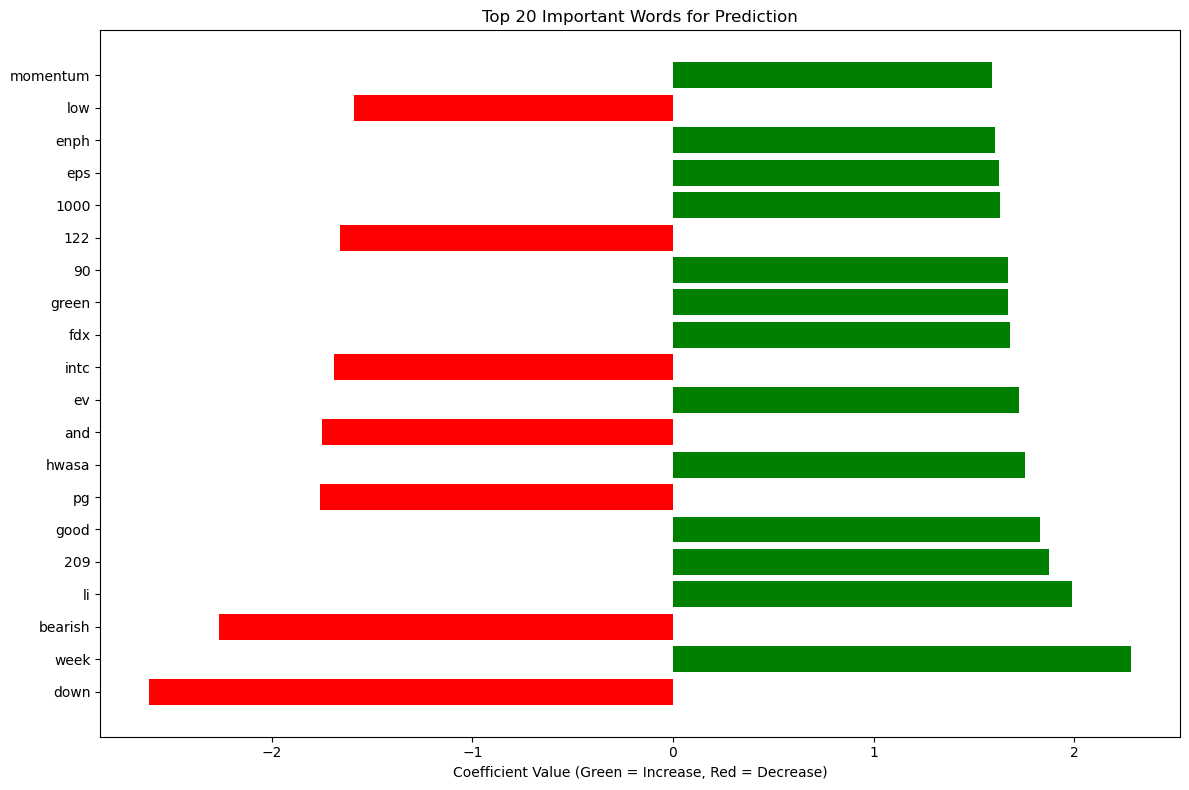

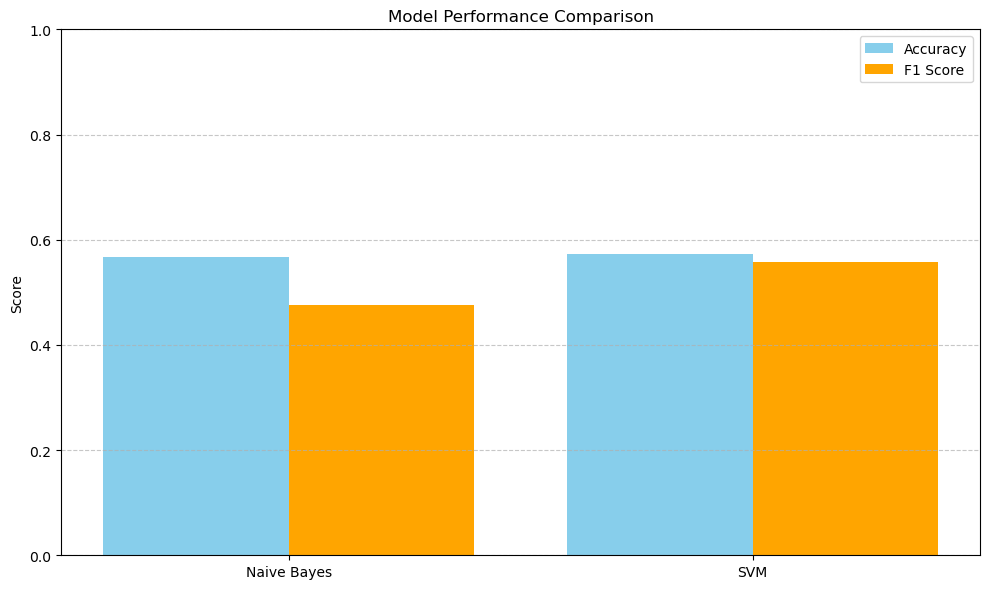

,Model,Accuracy,F1 Score
0,Naive Bayes,0.567600,0.475519
1,SVM,0.572473,0.558389


Number of examples misclassified by both models: 260
Number of examples misclassified only by Naive Bayes: 95
Number of examples misclassified only by SVM: 91

Samples misclassified by both models:


,stock,trading_day,post,label,nb_prediction,svm_prediction
3372,NFLX,2022-07-21,Market Recap: [URL] This problem will stop ANY...,1.0,-1.0,-1.0
3375,PYPL,2022-07-21,"WE DID IT AGAIN $10,000 in 27 Minutes 400% $PY...",1.0,-1.0,-1.0
3373,NIO,2022-07-21,FREE OPTIONS Ideas Scale out when above 25% Pr...,1.0,-1.0,-1.0
3377,TSM,2022-07-21,yw: do u not recognize me? tsm: ne? yw: im woo...,1.0,-1.0,-1.0
3371,MSFT,2022-07-21,7/21/22 Watchlist $GOOG 115/116c > $113.4 $AMZ...,1.0,-1.0,-1.0



Performance by stock:


,count,nb_accuracy,svm_accuracy
stock,,,
AAPL,50.0,0.540000,0.560000
MSFT,50.0,0.600000,0.640000
AMZN,50.0,0.480000,0.520000
TSM,50.0,0.560000,0.580000
TSLA,50.0,0.540000,0.480000
PG,50.0,0.740000,0.700000
NIO,50.0,0.540000,0.520000
AMD,50.0,0.500000,0.540000
GOOG,45.0,0.488889,0.488889



Example prediction for AAPL:
Post: 'The new product launch was amazing and I expect strong sales this quarter.'
Prediction: Decrease
Confidence: 0.4279
Models and vectorizer saved successfully!


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('dataset_entire_binary_2.csv')

timestamp= 'trading_day'

# Display basic information
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
display(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Display basic statistics
print("\nBasic statistics:")
display(df.describe())

# Ensure we have binary labels (-1 for Decrease, 1 for Increase)
# Remove any entries with label 0 (if they exist)
df = df[df['label'] != 0]

# Check label distribution
print("\nLabel distribution:")
print(df['label'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.xlabel('Label (-1: Decrease, 1: Increase)')
plt.ylabel('Count')
plt.show()

# Convert timestamp to datetime format
df[timestamp] = pd.to_datetime(df[timestamp])

# Sort by timestamp
df = df.sort_values(timestamp)

# Find unique timestamps
unique_timestamps = df[timestamp].unique()
print(f"Timestamp range: {unique_timestamps.min()} to {unique_timestamps.max()}")
print(f"Number of unique timestamps: {len(unique_timestamps)}")

# Calculate split point (e.g., 80% train, 20% test)
split_idx = int(len(unique_timestamps) * 0.8)
cutoff_timestamp = unique_timestamps[split_idx]
print(f"Train-test cutoff timestamp: {cutoff_timestamp}")

# Split the data
train_df = df[df[timestamp] <= cutoff_timestamp]
test_df = df[df[timestamp] > cutoff_timestamp]

print(f"Training set size: {train_df.shape[0]} ({train_df.shape[0]/df.shape[0]:.2%} of data)")
print(f"Testing set size: {test_df.shape[0]} ({test_df.shape[0]/df.shape[0]:.2%} of data)")

# Check label distribution in train and test sets
print("\nTrain set label distribution:")
print(train_df['label'].value_counts(normalize=True))

print("\nTest set label distribution:")
print(test_df['label'].value_counts(normalize=True))

# Check stock distribution
print("\nStock distribution:")
print(df['stock'].value_counts().head(10))  # Top 10 stocks

# Create features incorporating stock names
# We'll combine the stock name with the post text
train_df['stock_post'] = train_df['stock'] + " " + train_df['post']
test_df['stock_post'] = test_df['stock'] + " " + test_df['post']

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, min_df=2)

# Fit and transform on training data only to prevent data leakage
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['stock_post'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['stock_post'])

# Check the shape of the feature matrices
print(f"Training features shape: {X_train_tfidf.shape}")
print(f"Testing features shape: {X_test_tfidf.shape}")

# Get feature names (words) for interpretation
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"Number of features (words): {len(feature_names)}")
print(f"Sample features: {feature_names[:10]}")

# Prepare labels
y_train = train_df['label']
y_test = test_df['label']

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Make predictions
nb_predictions = nb_model.predict(X_test_tfidf)

# Evaluate the model
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions, average='weighted')

print("Naive Bayes Results:")
print(f"Accuracy: {nb_accuracy:.4f}")
print(f"F1 Score: {nb_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, nb_predictions))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, nb_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Initialize and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test_tfidf)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

print("SVM Results:")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"F1 Score: {svm_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, svm_predictions))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, svm_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Analyze feature importance for SVM model
if hasattr(svm_model, 'coef_'):
    # Convert sparse matrix to dense if needed
    if hasattr(svm_model.coef_, 'toarray'):
        coefficients = svm_model.coef_.toarray()
    else:
        coefficients = svm_model.coef_
    
    # For binary classification with classes -1 and 1, we can interpret coefficients directly
    # Positive coefficients favor class 1 (Increase), negative coefficients favor class -1 (Decrease)
    
    # Create list of tuples (feature, importance) and sort by absolute value
    feature_importance = [(feature, coef) for feature, coef in zip(feature_names, coefficients[0])]
    feature_importance.sort(key=lambda x: abs(x[1]), reverse=True)
    
    # Display top positive coefficients (favor Increase prediction)
    print(f"\nTop 10 words indicating price INCREASE:")
    positive_features = [(f, c) for f, c in feature_importance if c > 0][:10]
    for feature, coef in positive_features:
        print(f"{feature}: {coef:.4f}")
        
    # Display top negative coefficients (favor Decrease prediction)
    print(f"\nTop 10 words indicating price DECREASE:")
    negative_features = [(f, c) for f, c in feature_importance if c < 0][:10]
    for feature, coef in negative_features:
        print(f"{feature}: {coef:.4f}")
    
    # Plot top features
    plt.figure(figsize=(12, 8))
    top_features = feature_importance[:20]
    features = [f[0] for f in top_features]
    importances = [f[1] for f in top_features]
    colors = ['g' if imp > 0 else 'r' for imp in importances]
    
    # Create horizontal bar chart
    plt.barh(range(len(features)), importances, color=colors)
    plt.yticks(range(len(features)), features)
    plt.title('Top 20 Important Words for Prediction')
    plt.xlabel('Coefficient Value (Green = Increase, Red = Decrease)')
    plt.tight_layout()
    plt.show()
else:
    print("This SVM model doesn't have accessible coefficients for feature importance analysis")

# Compare models
models = ['Naive Bayes', 'SVM']
accuracies = [nb_accuracy, svm_accuracy]
f1_scores = [nb_f1, svm_f1]

plt.figure(figsize=(10, 6))
x = range(len(models))
plt.bar([i - 0.2 for i in x], accuracies, width=0.4, label='Accuracy', color='skyblue')
plt.bar([i + 0.2 for i in x], f1_scores, width=0.4, label='F1 Score', color='orange')
plt.xticks(x, models)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Create a summary table
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'F1 Score': f1_scores
})
display(results_df)

# Create a DataFrame with actual vs predicted labels
error_analysis_df = test_df.copy()
error_analysis_df['nb_prediction'] = nb_predictions
error_analysis_df['svm_prediction'] = svm_predictions

# Find misclassified examples for both models
misclassified_both = error_analysis_df[(error_analysis_df['label'] != error_analysis_df['nb_prediction']) & 
                                      (error_analysis_df['label'] != error_analysis_df['svm_prediction'])]

# Find examples misclassified by Naive Bayes but correctly classified by SVM
nb_errors_svm_correct = error_analysis_df[(error_analysis_df['label'] != error_analysis_df['nb_prediction']) & 
                                         (error_analysis_df['label'] == error_analysis_df['svm_prediction'])]

# Find examples misclassified by SVM but correctly classified by Naive Bayes
svm_errors_nb_correct = error_analysis_df[(error_analysis_df['label'] == error_analysis_df['nb_prediction']) & 
                                         (error_analysis_df['label'] != error_analysis_df['svm_prediction'])]

print(f"Number of examples misclassified by both models: {len(misclassified_both)}")
print(f"Number of examples misclassified only by Naive Bayes: {len(nb_errors_svm_correct)}")
print(f"Number of examples misclassified only by SVM: {len(svm_errors_nb_correct)}")

# Display some examples of common errors
print("\nSamples misclassified by both models:")
display(misclassified_both[['stock', timestamp, 'post', 'label', 'nb_prediction', 'svm_prediction']].head(5))

# Analysis by stock
print("\nPerformance by stock:")
stock_performance = error_analysis_df.groupby('stock').apply(
    lambda x: pd.Series({
        'count': len(x),
        'nb_accuracy': accuracy_score(x['label'], x['nb_prediction']),
        'svm_accuracy': accuracy_score(x['label'], x['svm_prediction'])
    })
)
# Sort by count (descending)
stock_performance = stock_performance.sort_values('count', ascending=False)
# Display top 10 stocks by sample count
display(stock_performance.head(10))

# Create a prediction function for new data
def predict_stock_movement(stock_name, post_text, model='svm'):
    """
    Predict whether a stock will increase or decrease based on a post.
    
    Parameters:
    -----------
    stock_name : str
        The ticker symbol or name of the stock
    post_text : str
        The text of the post about the stock
    model : str, optional (default='svm')
        The model to use for prediction ('svm' or 'nb')
    
    Returns:
    --------
    prediction : int
        -1 for predicted decrease, 1 for predicted increase
    probability : float
        Confidence score for the prediction (if available)
    """
    # Combine stock name and post text
    stock_post = stock_name + " " + post_text
    
    # Vectorize the input
    X = tfidf_vectorizer.transform([stock_post])
    
    # Make prediction
    if model.lower() == 'svm':
        # SVM prediction
        prediction = svm_model.predict(X)[0]
        # Get decision function value as a confidence score
        confidence = abs(svm_model.decision_function(X)[0])
        return prediction, confidence
    else:
        # Naive Bayes prediction
        prediction = nb_model.predict(X)[0]
        # Get probability of the predicted class
        proba = nb_model.predict_proba(X)[0]
        max_proba = max(proba)
        return prediction, max_proba

# Example usage of the prediction function
example_stock = "AAPL"
example_post = "The new product launch was amazing and I expect strong sales this quarter."
prediction, confidence = predict_stock_movement(example_stock, example_post)
print(f"\nExample prediction for {example_stock}:")
print(f"Post: '{example_post}'")
print(f"Prediction: {'Increase' if prediction == 1 else 'Decrease'}")
print(f"Confidence: {confidence:.4f}")

# Save the models for future use
import pickle

# Save the vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

# Save the Naive Bayes model
with open('naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(nb_model, f)

# Save the SVM model
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

print("Models and vectorizer saved successfully!")

# Function to make batch predictions
def batch_predict(data_path, output_path=None):
    """
    Make predictions on a batch of data from a CSV file
    
    Parameters:
    -----------
    data_path : str
        Path to the CSV file containing the data
    output_path : str, optional
        Path to save the predictions. If None, doesn't save.
    
    Returns:
    --------
    predictions_df : pandas.DataFrame
        DataFrame with the original data and predictions
    """
    # Read the data
    predict_df = pd.read_csv(data_path)
    
    # Ensure required columns exist
    required_cols = ['stock', 'post']
    for col in required_cols:
        if col not in predict_df.columns:
            raise ValueError(f"Column '{col}' not found in the input data")
    
    # Create stock_post column
    predict_df['stock_post'] = predict_df['stock'] + " " + predict_df['post']
    
    # Vectorize the data
    X_predict = tfidf_vectorizer.transform(predict_df['stock_post'])
    
    # Make predictions using both models
    predict_df['nb_prediction'] = nb_model.predict(X_predict)
    predict_df['svm_prediction'] = svm_model.predict(X_predict)
    
    # Add SVM confidence scores
    if hasattr(svm_model, 'decision_function'):
        decision_values = svm_model.decision_function(X_predict)
        predict_df['svm_confidence'] = np.abs(decision_values)
    
    # Add Naive Bayes probabilities
    if hasattr(nb_model, 'predict_proba'):
        probas = nb_model.predict_proba(X_predict)
        max_probas = np.max(probas, axis=1)
        predict_df['nb_confidence'] = max_probas
    
    # Save the predictions if output_path is provided
    if output_path:
        predict_df.to_csv(output_path, index=False)
        print(f"Predictions saved to {output_path}")
    
    return predict_df

# Example usage of batch prediction (commented out)
# predictions = batch_predict('new_data.csv', 'predictions.csv')
# print("\nBatch predictions summary:")
# print(predictions[['stock', 'svm_prediction', 'svm_confidence']].head())